In [ ]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss 
from sklearn.metrics import roc_auc_score,roc_curve 
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
!gdown --id 1NXJJNpL5psy-vPzJHIYl4WaeIbky66sR


from warnings import filterwarnings #uyarıları kapatmak için
filterwarnings('ignore') #uyarıları kapatmak için

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bqn-t5HocFwNEeMIbH9Z4fbWogsQf1O7
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 42.6MB/s]


In [ ]:
diabetes = pd.read_csv("diabetes.csv") #veri seti okundu
df = diabetes.copy() #veri seti kopyalandı
df = df.dropna() # eksik gözlemler silindi
df.head() #ilk 5 gözlem gösterildi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

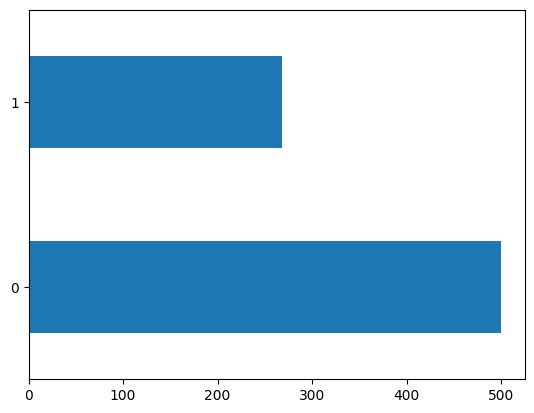

In [ ]:
df["Outcome"].value_counts().plot.barh();

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
y = df["Outcome"] 
X = df.drop(["Outcome"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.25,
                                                   random_state = 42)

In [ ]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = loj_model.predict(X_test)

In [ ]:
y_pred_prob = loj_model.predict_proba(X_test)[:,1]
y_pred_prob[:10]

array([0.33654829, 0.22327854, 0.17599826, 0.21454126, 0.43335405,
       0.42044811, 0.05402788, 0.6638032 , 0.53468386, 0.66773498])

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

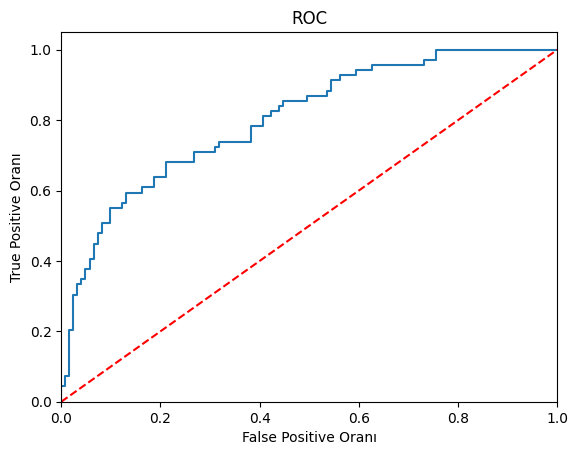

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.show()

In [ ]:
confusion_matrix(y_test, y_pred)

array([[100,  23],
       [ 25,  44]])

In [ ]:
accuracy_score(y_test, loj_model.predict(X_test))

0.75

In [ ]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7397368421052632